# ✈️ Airline Delay Analysis Project

## 📌 Objective
The objective of this project is to analyze airline delay patterns, evaluate airline performance, identify relationships between variables, and estimate the financial impact caused by flight delays.

## 📚 Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Loading the Dataset
We load the airline dataset for analysis.

In [4]:
df = pd.read_csv('2015.csv', nrows=100000)
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains flight details including departure time, arrival time, delay minutes, distance, and airline information.

## 🔍 Dataset Structure Overview
This shows data types and missing values in each column.

## 🔍 Dataset Structure Overview
This shows data types and missing values in each column.

## 🔍 Dataset Structure Overview
This shows data types and missing values in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              100000 non-null  object 
 1   OP_CARRIER           100000 non-null  object 
 2   OP_CARRIER_FL_NUM    100000 non-null  int64  
 3   ORIGIN               100000 non-null  object 
 4   DEST                 100000 non-null  object 
 5   CRS_DEP_TIME         100000 non-null  int64  
 6   DEP_TIME             97674 non-null   float64
 7   DEP_DELAY            97674 non-null   float64
 8   TAXI_OUT             97605 non-null   float64
 9   WHEELS_OFF           97605 non-null   float64
 10  WHEELS_ON            97526 non-null   float64
 11  TAXI_IN              97526 non-null   float64
 12  CRS_ARR_TIME         100000 non-null  int64  
 13  ARR_TIME             97526 non-null   float64
 14  ARR_DELAY            97352 non-null   float64
 15  CANCELLED         

## 🧹 Missing Value Analysis
We check the number of missing values in each column before cleaning the dataset.

In [6]:
df.isnull().sum()

,0
FL_DATE,0
OP_CARRIER,0
OP_CARRIER_FL_NUM,0
ORIGIN,0
DEST,0
CRS_DEP_TIME,0
DEP_TIME,2326
DEP_DELAY,2326
TAXI_OUT,2395
WHEELS_OFF,2395


Some columns such as DEP_TIME, DEP_DELAY, TAXI_OUT, and WHEELS_OFF contain missing values.
These missing values will be handled before performing further analysis.


## 📊 Descriptive Statistical Summary
Understanding the central tendency, spread, and distribution of numerical features.

In [7]:
df.describe()


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,100000.00000,100000.000000,97674.000000,97674.000000,97605.000000,97605.000000,97526.000000,97526.000000,100000.000000,97526.000000,...,100000.000000,97352.000000,97352.000000,100000.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,0.0
mean,2250.43852,1334.802220,1355.516125,20.300152,17.076851,1377.359879,1479.688719,8.111068,1506.843580,1482.802145,...,142.994360,142.269383,117.090825,830.933080,17.608867,2.737387,13.907498,0.071949,26.374753,NaN
std,1832.22498,477.914905,499.058115,45.874593,10.637153,500.285556,533.928725,7.559546,497.694269,539.880717,...,76.421168,76.777891,74.432933,610.988692,42.811999,17.142624,26.024473,1.704584,42.626767,NaN
min,1.00000,5.000000,1.000000,-39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,17.000000,9.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,755.00000,930.000000,937.000000,-3.000000,11.000000,951.000000,1105.000000,4.000000,1120.000000,1108.000000,...,85.000000,85.000000,62.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1695.00000,1330.000000,1345.000000,3.000000,14.000000,1358.000000,1519.000000,6.000000,1527.000000,1522.000000,...,125.000000,124.000000,98.000000,669.000000,4.000000,0.000000,4.000000,0.000000,11.000000,NaN
75%,3415.00000,1730.000000,1751.000000,26.000000,20.000000,1805.000000,1920.000000,9.000000,1920.000000,1925.000000,...,175.000000,177.000000,150.000000,1069.000000,19.000000,0.000000,18.000000,0.000000,36.000000,NaN
max,7438.00000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,2400.000000,179.000000,2359.000000,2400.000000,...,718.000000,724.000000,676.000000,4983.000000,1380.000000,562.000000,590.000000,107.000000,891.000000,NaN


## 🧼 Data Cleaning
Removing rows where critical delay values (Departure Delay and Arrival Delay) are missing.

In [10]:
df = df.dropna(subset=['DEP_DELAY', 'ARR_DELAY'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97352 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              97352 non-null  object 
 1   OP_CARRIER           97352 non-null  object 
 2   OP_CARRIER_FL_NUM    97352 non-null  int64  
 3   ORIGIN               97352 non-null  object 
 4   DEST                 97352 non-null  object 
 5   CRS_DEP_TIME         97352 non-null  int64  
 6   DEP_TIME             97352 non-null  float64
 7   DEP_DELAY            97352 non-null  float64
 8   TAXI_OUT             97352 non-null  float64
 9   WHEELS_OFF           97352 non-null  float64
 10  WHEELS_ON            97352 non-null  float64
 11  TAXI_IN              97352 non-null  float64
 12  CRS_ARR_TIME         97352 non-null  int64  
 13  ARR_TIME             97352 non-null  float64
 14  ARR_DELAY            97352 non-null  float64
 15  CANCELLED            97352 non-null  floa

## 📈 Arrival Delay Distribution
Visualizing how arrival delays are distributed across flights.

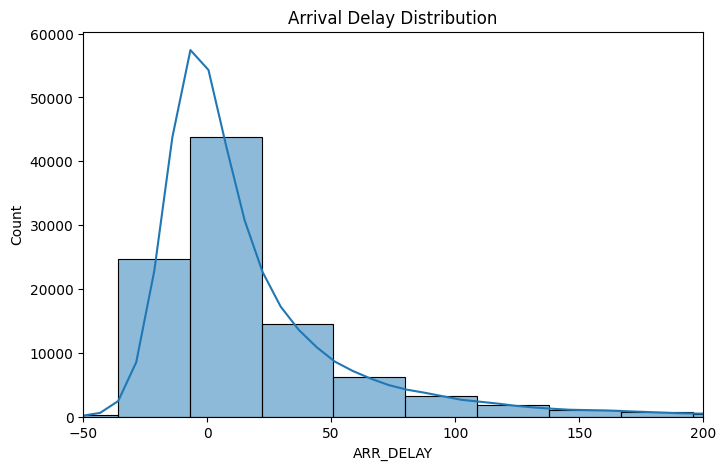

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['ARR_DELAY'], bins=50, kde=True)
plt.title("Arrival Delay Distribution")
plt.xlim(-50,200)
plt.show()

## 🏢 Top 10 Airlines by Average Arrival Delay
Comparing airlines based on their average arrival delay.

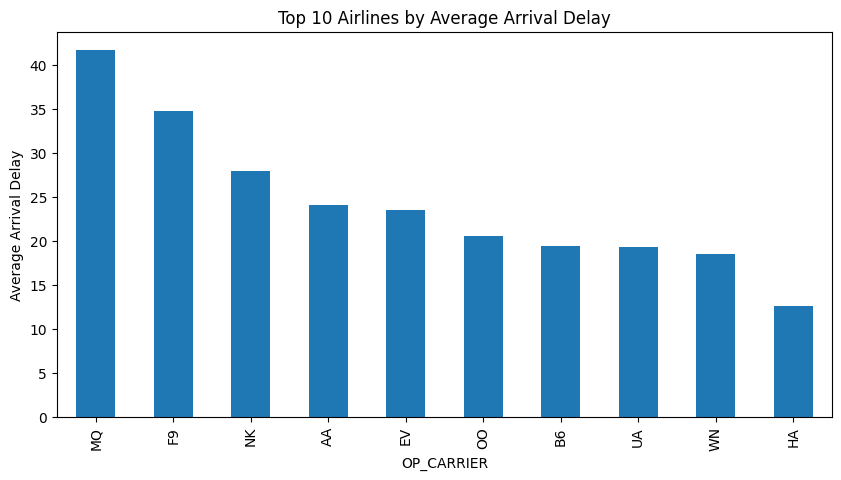

In [12]:
airline_delay = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
airline_delay.head(10).plot(kind='bar')
plt.title("Top 10 Airlines by Average Arrival Delay")
plt.ylabel("Average Arrival Delay")
plt.show()

## 🔎 Departure Delay vs Arrival Delay
Analyzing the relationship between departure delay and arrival delay.

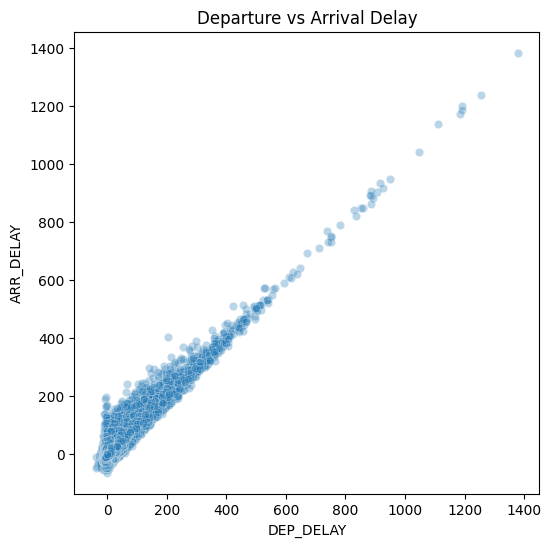

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=df, alpha=0.3)
plt.title("Departure vs Arrival Delay")
plt.show()

## 📏 Distance vs Arrival Delay
Examining whether flight distance impacts arrival delay.

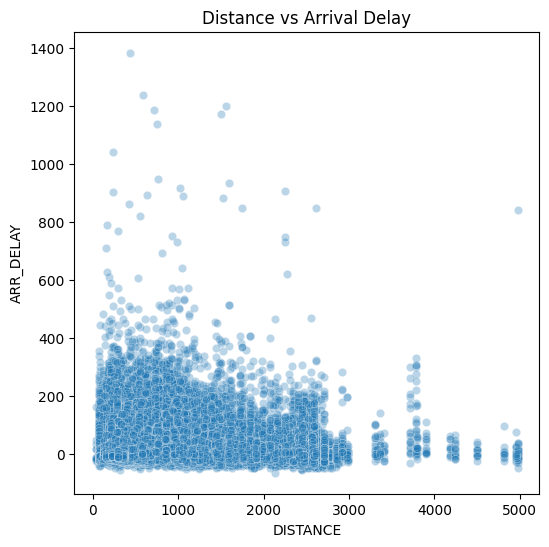

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY', data=df, alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.show()

## 🤖 KMeans Clustering of Flight Delays
Grouping flights based on delay patterns using clustering.

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['DEP_DELAY', 'ARR_DELAY']]

# Drop any remaining nulls
X = X.dropna()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_

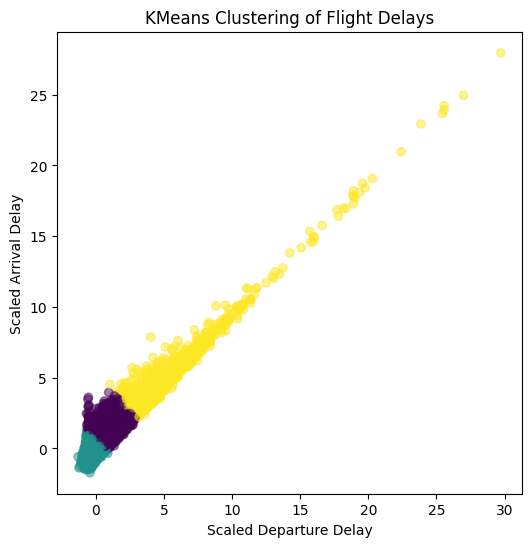

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering of Flight Delays")
plt.xlabel("Scaled Departure Delay")
plt.ylabel("Scaled Arrival Delay")
plt.show()

## 📉 Linear Regression Model for Delay Prediction
Building a predictive model to estimate arrival delay.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features
X = df[['DEP_DELAY', 'DISTANCE']]

# Target
y = df['ARR_DELAY']

# Remove nulls
data = df[['DEP_DELAY', 'DISTANCE', 'ARR_DELAY']].dropna()

X = data[['DEP_DELAY', 'DISTANCE']]
y = data['ARR_DELAY']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 📊 Model Performance Evaluation
Evaluating the regression model using R² score.

In [29]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9048708996052901


## 💰 Financial Impact of Flight Delays
Estimating financial loss assuming ₹100 cost per minute of delay.

In [25]:
# Assume ₹100 per minute delay cost
cost_per_minute = 100

In [30]:
df.loc[:, 'Financial_Loss'] = df['ARR_DELAY'] * cost_per_minute

In [27]:
average_loss = df['Financial_Loss'].mean()
total_loss = df['Financial_Loss'].sum()

print("Average Loss per Flight (₹):", round(average_loss,2))
print("Total Estimated Loss (₹):", round(total_loss,2))

Average Loss per Flight (₹): 1865.4
Total Estimated Loss (₹): 181600200.0


## ✅ Project Conclusion
Summarizing key findings from analysis, modeling, and financial estimation.